In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os #for interacting with os
import glob
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import zipfile

with zipfile.ZipFile('/content/gdrive/MyDrive/Project_Capstone/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [4]:
!unzip gdrive/My\ Drive/Project_Capstone/archive.zip

Archive:  gdrive/My Drive/Project_Capstone/archive.zip
replace dataset-ayam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-ayam.csv        
replace dataset-ikan.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-ikan.csv        
replace dataset-kambing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-kambing.csv     
replace dataset-sapi.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-sapi.csv        
replace dataset-tahu.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-tahu.csv        
replace dataset-telur.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-telur.csv       
replace dataset-tempe.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-tempe.csv       
replace dataset-udang.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset-udang.csv       


In [5]:
df_ayam = pd.read_csv('dataset-ayam.csv')
df_ikan = pd.read_csv('dataset-ikan.csv')
df_kambing = pd.read_csv('dataset-kambing.csv')
df_sapi = pd.read_csv('dataset-sapi.csv')
df_tahu = pd.read_csv('dataset-tahu.csv')
df_telur = pd.read_csv('dataset-telur.csv')
df_tempe = pd.read_csv('dataset-tempe.csv')
df_udang = pd.read_csv('dataset-udang.csv')

df = df_ayam.append([df_ikan,df_kambing,df_sapi,df_tahu,df_telur,df_tempe,df_udang])

<ipython-input-5-e18ef5925dc2>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_ayam.append([df_ikan,df_kambing,df_sapi,df_tahu,df_telur,df_tempe,df_udang])


In [6]:
df

,Title,Ingredients,Steps,Loves,URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam
...,...,...,...,...,...
1989,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega
1990,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang
1991,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe
1992,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...


In [ ]:
df.info

<bound method DataFrame.info of                                   Title  \
0                      Ayam Woku Manado   
1              Ayam goreng tulang lunak   
2                      Ayam cabai kawin   
3                           Ayam Geprek   
4                           Minyak Ayam   
...                                 ...   
1989                 Udang saus mentega   
1990                 Jipang tumis udang   
1991                  Tumis Udang Tempe   
1992  Tumis kacang panjang terong udang   
1993                  Siomay Udang Ayam   

                                            Ingredients  \
0     1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...   
1     1 kg ayam (dipotong sesuai selera jangan kecil...   
2     1/4 kg ayam--3 buah cabai hijau besar--7 buah ...   
3     250 gr daging ayam (saya pakai fillet)--Secuku...   
4     400 gr kulit ayam & lemaknya--8 siung bawang p...   
...                                                 ...   
1989  1 kg udang segar--1 buah bawang 

In [7]:
df.shape


(15641, 5)

In [8]:
a = df.isnull().sum()
print(a)

Title           0
Ingredients    48
Steps          46
Loves           0
URL             0
dtype: int64


In [9]:
df[df['Ingredients'].isnull()]


,Title,Ingredients,Steps,Loves,URL
255,[Notitle],NaN,NaN,0,/id/resep/4459283-ayam-bakar
258,[Notitle],NaN,NaN,0,/id/resep/4458951-sate-ayam-maknyusss
298,[Notitle],NaN,NaN,0,/id/resep/4454787-garang-asam-ayam-kampung
302,[Notitle],NaN,NaN,0,/id/resep/4454903-ayam-kremes
464,[Notitle],NaN,NaN,0,/id/resep/4444134-ayam-balado-simple
521,[Notitle],NaN,NaN,0,/id/resep/4442538-perkedel-ayam
523,[Notitle],NaN,NaN,0,/id/resep/4442319-chicken-wings-saos-mentega
524,[Notitle],NaN,NaN,0,/id/resep/4442267-ayam-sambal-ijo
835,[Notitle],NaN,NaN,0,/id/resep/4410020-ayam-terriyaki
849,[Notitle],NaN,NaN,0,/id/resep/4409498-mie-ayam-homemade-ala-mama-n...


In [10]:
df[df['Steps'].isnull()]

,Title,Ingredients,Steps,Loves,URL
255,[Notitle],NaN,NaN,0,/id/resep/4459283-ayam-bakar
258,[Notitle],NaN,NaN,0,/id/resep/4458951-sate-ayam-maknyusss
298,[Notitle],NaN,NaN,0,/id/resep/4454787-garang-asam-ayam-kampung
302,[Notitle],NaN,NaN,0,/id/resep/4454903-ayam-kremes
464,[Notitle],NaN,NaN,0,/id/resep/4444134-ayam-balado-simple
521,[Notitle],NaN,NaN,0,/id/resep/4442538-perkedel-ayam
523,[Notitle],NaN,NaN,0,/id/resep/4442319-chicken-wings-saos-mentega
524,[Notitle],NaN,NaN,0,/id/resep/4442267-ayam-sambal-ijo
835,[Notitle],NaN,NaN,0,/id/resep/4410020-ayam-terriyaki
849,[Notitle],NaN,NaN,0,/id/resep/4409498-mie-ayam-homemade-ala-mama-n...


In [11]:
df[df['Title'].str.contains('Notitle', case=True)]

,Title,Ingredients,Steps,Loves,URL
255,[Notitle],NaN,NaN,0,/id/resep/4459283-ayam-bakar
258,[Notitle],NaN,NaN,0,/id/resep/4458951-sate-ayam-maknyusss
298,[Notitle],NaN,NaN,0,/id/resep/4454787-garang-asam-ayam-kampung
302,[Notitle],NaN,NaN,0,/id/resep/4454903-ayam-kremes
464,[Notitle],NaN,NaN,0,/id/resep/4444134-ayam-balado-simple
521,[Notitle],NaN,NaN,0,/id/resep/4442538-perkedel-ayam
523,[Notitle],NaN,NaN,0,/id/resep/4442319-chicken-wings-saos-mentega
524,[Notitle],NaN,NaN,0,/id/resep/4442267-ayam-sambal-ijo
835,[Notitle],NaN,NaN,0,/id/resep/4410020-ayam-terriyaki
849,[Notitle],NaN,NaN,0,/id/resep/4409498-mie-ayam-homemade-ala-mama-n...


In [12]:
df['Ingredients'].fillna('NoIngredients', inplace=True)

In [13]:
df.isnull().sum()

Title           0
Ingredients     0
Steps          46
Loves           0
URL             0
dtype: int64

In [14]:
df['Steps'].fillna('NoSteps', inplace=True)

In [15]:
df.isnull().sum()


Title          0
Ingredients    0
Steps          0
Loves          0
URL            0
dtype: int64

In [17]:
df['numberof_Ingredients'] = df [ 'Ingredients'].str.count('--')

In [18]:
df['numberof_Steps'] = df['Steps'].str.count('--')

In [19]:
df.head(10)

,Title,Ingredients,Steps,Loves,URL,numberof_Ingredients,numberof_Steps
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,14,7
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,11,5
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin,10,3
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek,7,3
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam,5,6
5,Nasi Bakar Ayam,"1 piring nasi--¹/⁴ fillet ayam, potong kotak, ...","Tumis bumbu halus, masukkan daun salam, serai-...",1,/id/resep/4472552-nasi-bakar-ayam,23,7
6,Ayam Saus Hintalu Jaruk,1/2 Ekor ayam--2 Butir Hintalu Jaruk--1 Buah C...,Potong ayam menjadi kotak-kotak ukuran sedang ...,0,/id/resep/4437475-ayam-saus-hintalu-jaruk,10,7
7,Ayam saos teriyaki Lada Hitam,Ayam bagian dada dan tulang--1 buah bawang bom...,Cara Buat :\n1. Sediakan teplon or wajan beri ...,0,/id/resep/4472877-ayam-saos-teriyaki-lada-hitam,13,4
8,Steak ayam,300 gr dada ayam fillet--1 sdm air jeruk nipis...,"Cuci bersih ayam, iris tipis melebar, rendam d...",6,/id/resep/4472822-steak-ayam,28,6
9,Ayam Saos Asam Manis Simple,1/4 kg Ayam bagian dada fillet (Potong dadu)--...,Lumuri ayam yg sdh dipotong dadu dgn garam & p...,6,/id/resep/4472901-ayam-saos-asam-manis-simple,11,9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128069 (\N{TONGUE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


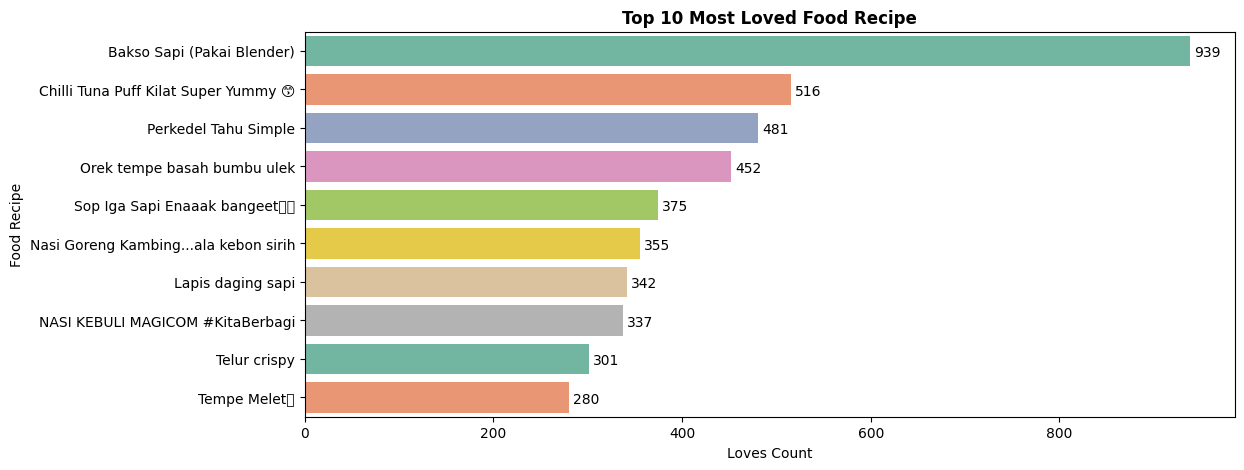

In [20]:
plt.figure(figsize=(12,5))

ax=sns.barplot(y=df.sort_values(by='Loves', ascending=False).head(10).Title,
            x=df.sort_values(by='Loves', ascending=False).head(10).Loves,
           palette='Set2')

for p in ax.patches:
    width = p.get_width()
    plt.text(18+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

sns.set(style='darkgrid')

plt.xticks()

plt.xlabel('Loves Count')
plt.ylabel('Food Recipe')
plt.title('Top 10 Most Loved Food Recipe', fontweight="bold")
plt.show()

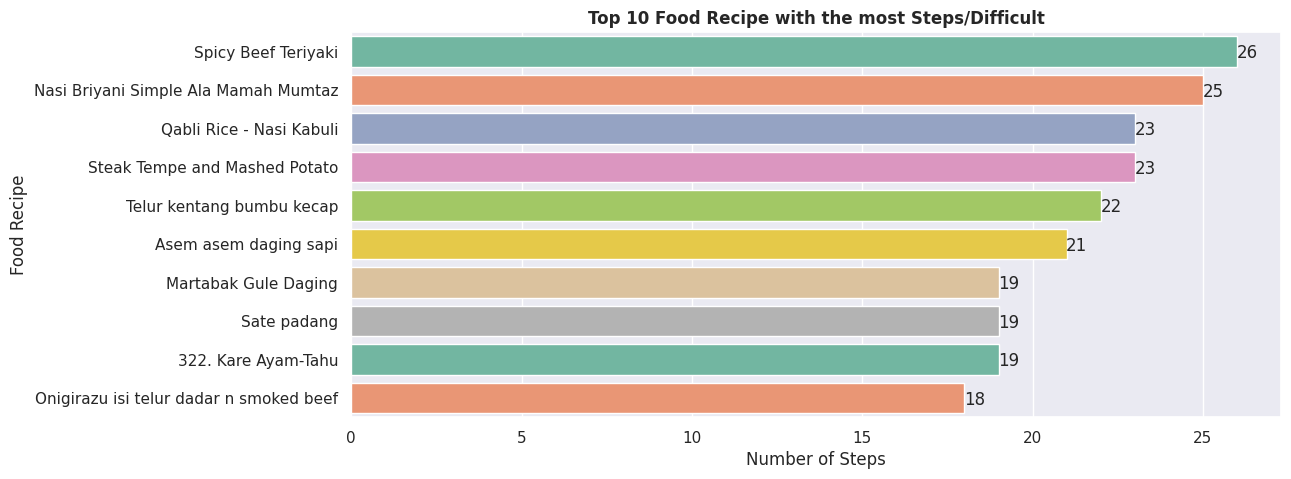

In [21]:
plt.figure(figsize=(12,5))

ax=sns.barplot(y=df.sort_values(by='numberof_Steps', ascending=False).head(10).Title,
              x=df.sort_values(by='numberof_Steps', ascending=False).head(10).numberof_Steps,
              palette='Set2')

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

sns.set(style='darkgrid')

plt.xticks()

plt.title('Top 10 Food Recipe with the most Steps/Difficult', fontweight='bold')
plt.xlabel('Number of Steps')
plt.ylabel('Food Recipe')
plt.show()